# Taller 8

## Objetivos

## Actividades a realizar

## Python

### Machine learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc

In [2]:
driver = gdal.GetDriverByName('GTiff')
file = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/slope_rad')
pendiente = file.GetRasterBand(1)
pendiente = pendiente.ReadAsArray()
pendiente=np.where(pendiente==-3.4028234663852886e+38,np.nan,pendiente)
pendiente=pendiente*180/np.pi
pendiente_vector=pendiente.ravel()
pendiente_vector2=np.nan_to_num(pendiente_vector)
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos inf

raster = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/curvatura')
curvatura=raster.GetRasterBand(1)
curvatura=curvatura.ReadAsArray()
curvatura=np.where(curvatura==-3.4028234663852886e+38,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector2=np.nan_to_num(curvatura_vector)
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]

raster = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/aspecto')
aspecto=raster.GetRasterBand(1)
aspecto=aspecto.ReadAsArray()
aspecto=np.where(aspecto==-3.4028234663852886e+38,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector2=np.nan_to_num(aspecto_vector)
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]

raster = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/flowacum_m2')
flujo=raster.GetRasterBand(1)
flujo=flujo.ReadAsArray()
flujo=np.where(flujo==-3.4028234663852886e+38,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector2=np.nan_to_num(flujo_vector)
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]

raster = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/inventario.tif')
inventario=raster.GetRasterBand(1)
inventario=inventario.ReadAsArray()
msk=np.where(pendiente>=0,1,np.nan)
inventario=msk*inventario
inventario=np.where(inventario==1,0,inventario)
inventario=np.where(inventario==2,1,inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]

In [3]:
#Dataframe con las variables filtradas 
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM,
   'curvatura':curvatura_vector_MenM}
x = pd.DataFrame(d)
y=x['inventario']
x.drop('inventario', axis=1, inplace=True)
print('vectores de x',list(x.columns))
columns=x.columns

#Dataframe de las variables de todo el mapa
f={'pendiente':pendiente_vector2,'flujo_acum':flujo_vector2,'aspecto':aspecto_vector2, 'curvatura':curvatura_vector2}
x_map=pd.DataFrame(f)
print('vectores de x-map',list(x_map.columns))

vectores de x ['pendiente', 'flujo_acum', 'aspecto', 'curvatura']
vectores de x-map ['pendiente', 'flujo_acum', 'aspecto', 'curvatura']


In [4]:
#Separacion de la base de datos en celdas de entrenamiento para evaluacion del desempeño y celdas de validacion para prediccion del modelo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)
print('Tamaño de variables de entrenamiento:', X_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', X_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (79248, 4)
Tamaño de labels de entrenamiento: (79248,)
Tamaño de variables de validación: (19812, 4)
Tamaño de labels de validación: (19812,)


## Redes Neuronales

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Estandarizar las variables
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Implementar el modelo de Redes neuronales denominado Multilayer Perceptron, en este caso dos capas escondidas de 5 y 2 neuronas
mlp = MLPClassifier(hidden_layer_sizes=(5,2),max_iter=500)
model=mlp.fit(X_train,y_train)

y_train_predProba=model.predict_proba(X_train)[:,1]
y_test_predProba = model.predict_proba(X_test)[:,1]

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [6]:
# Calculate and display accuracy
print(accuracy_score(y_test, y_test_pred))

0.9729456894811226


In [7]:
#Matriz de confusion para desempeño
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[77153     0]
 [ 2095     0]]
[[19276     0]
 [  536     0]]


In [8]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     77153
         1.0       0.00      0.00      0.00      2095

    accuracy                           0.97     79248
   macro avg       0.49      0.50      0.49     79248
weighted avg       0.95      0.97      0.96     79248

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     19276
         1.0       0.00      0.00      0.00       536

    accuracy                           0.97     19812
   macro avg       0.49      0.50      0.49     19812
weighted avg       0.95      0.97      0.96     19812



C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.7, 0.1, 'AUC=0.7965%')

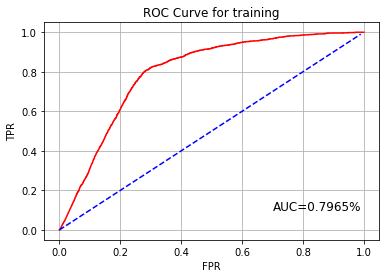

In [9]:
#Curva ROC y AUC utilizando metrics.roc_curve
fpr, sensitivity, _=roc_curve(y_train,y_train_predProba)
plt.plot(fpr,sensitivity,color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc=str(round(auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

TypeError: 'str' object is not callable

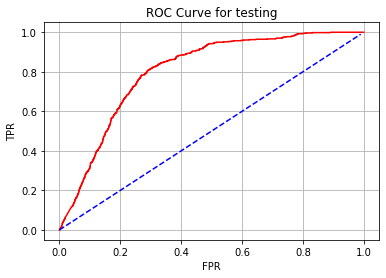

In [10]:
#Curva ROC y AUC utilizando metrics.roc_curve
fpr, sensitivity, _=roc_curve(y_test,y_test_predProba)
plt.plot(fpr,sensitivity,color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for testing')
auc=str(round(auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [17]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, y_train_predProba)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, y_test_predProba)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Train ROC AUC Score: 0.7991619912044712
Test ROC AUC  Score: 0.8016103661501581
Baseline ROC AUC: 0.5


In [18]:
#prediccion de todo el mapa
IS=mlp.predict(x_map)

## Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=8)

# Train the model on training data
model=tree.fit(X_train, y_train)

"""
print(f'El Arbol de decisión tiene {tree.tree_.node_count} nodos con una profundidad máxima de {tree.tree_.max_depth}.')

# Para exportar como imagen el arbol de decision, priemro Export as dot
export_graphviz(tree, 'tree.dot', rounded = True, feature_names = columns, class_names = ['0', '1'], filled = True)
# Use dot file to create a graph

(graph, ) = pydot.graph_from_dot_file('G:\My Drive\CATEDRA\CARTOGRAFIA GEOTECNICA\CartografiaGeotecnica\TALLERES\Taller 8_evaluacion\tree.dot')
# Write graph to a png file
graph.write_png('trees.png')
"""

#Obtener las predicciones y probabilidad de las predicciones para los datos de entrenamiento y los datos de validación
y_train_predProba=model.predict_proba(X_train)[:,1]
y_test_predProba = model.predict_proba(X_test)[:,1]

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [20]:
# Calculate and display accuracy
print(accuracy_score(y_test, y_test_pred))

0.949323642237028


In [21]:
#Matriz de confusion
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[77153     0]
 [    0  2095]]
[[18769   507]
 [  497    39]]


In [22]:
#Evaluacion del desempeño y capacidad de prediccion del modelo
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77153
         1.0       1.00      1.00      1.00      2095

    accuracy                           1.00     79248
   macro avg       1.00      1.00      1.00     79248
weighted avg       1.00      1.00      1.00     79248

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     19276
         1.0       0.07      0.07      0.07       536

    accuracy                           0.95     19812
   macro avg       0.52      0.52      0.52     19812
weighted avg       0.95      0.95      0.95     19812



In [23]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, y_train_predProba)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, y_test_predProba)}')
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.5232295283284759
Baseline ROC AUC: 0.5


## Random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
model= rf_small.fit(X_train, y_train)

#Obtener las predicciones y probabilidad de las predicciones para los datos de entrenamiento y los datos de validación
y_train_predProba=model.predict_proba(X_train)[:,1]
y_test_predProba = model.predict_proba(X_test)[:,1]

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Para predecir todo el mapa
IS=model.predict(x_map)

In [14]:
# Calculate and display accuracy
print(accuracy_score(y_test, y_test_pred))

0.9729456894811226


In [17]:
#Matriz de confusion
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[77153     0]
 [ 2095     0]]
[[19276     0]
 [  536     0]]


In [18]:
#Evaluacion del desempeño y capacidad de prediccion del modelo
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     77153
         1.0       0.00      0.00      0.00      2095

    accuracy                           0.97     79248
   macro avg       0.49      0.50      0.49     79248
weighted avg       0.95      0.97      0.96     79248

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     19276
         1.0       0.00      0.00      0.00       536

    accuracy                           0.97     19812
   macro avg       0.49      0.50      0.49     19812
weighted avg       0.95      0.97      0.96     19812



C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Analisis discriminante

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
data_projected = LDA.fit_transform(X_train,y_train)

#predicting the test set results
y_train_pred = LDA.predict(X_train)
y_test_pred = LDA.predict(X_test)

#calcular la probabildaid apra cada clase
y_train_predProb=LDA.predict_proba(X_train)
y_test_predProb=LDA.predict_proba(X_test)

#Para predecir todo el mapa
IS=LDA.predict(x_map)

In [21]:
# Calculate and display accuracy
print(accuracy_score(y_test, y_test_pred))

0.9729456894811226


In [22]:
#Matriz de confusion
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[77153     0]
 [ 2095     0]]
[[19276     0]
 [  536     0]]


In [23]:
#Evaluacion del desempeño y capacidad de prediccion del modelo
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     77153
         1.0       0.00      0.00      0.00      2095

    accuracy                           0.97     79248
   macro avg       0.49      0.50      0.49     79248
weighted avg       0.95      0.97      0.96     79248

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     19276
         1.0       0.00      0.00      0.00       536

    accuracy                           0.97     19812
   macro avg       0.49      0.50      0.49     19812
weighted avg       0.95      0.97      0.96     19812



C:\Users\usuario\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)

#predicting the test set results
y_train_pred = LDA.predict(X_train)
y_test_pred = LDA.predict(X_test)

#calcular la probabildaid apra cada clase
y_train_predProb=LDA.predict_proba(X_train)
y_test_predProb=LDA.predict_proba(X_test)

#Para predecir todo el mapa
IS=model.predict(x_map)

In [ ]:
# Calculate and display accuracy
print(accuracy_score(y_test, y_test_pred))

In [ ]:
#Matriz de confusion
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

In [ ]:
#Evaluacion del desempeño y capacidad de prediccion del modelo
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

### Curva de éxito 

In [11]:
import numpy as np
from osgeo import gdal
import pandas as pd
from numpy import cumsum
%matplotlib notebook

In [85]:
#importar mapa de factor de seguridad FS
FS_hazard  = np.genfromtxt('FS_AMEACA.txt')
FS_vector=FS_hazard.ravel()
FS_vector1=FS_vector[FS_vector!=-9999]
FS_max=FS_vector1.max()
FS_min=FS_vector1.min()

#importar inventario de movimientso en masa
raster = gdal.Open(r'G:\My Drive\CATEDRA\MACHINE LEARNING/datos/raster/inventario.tif')
inventario=raster.GetRasterBand(1)
inv_raster=inventario.ReadAsArray()
inv_raster=np.where(FS_hazard==-9999,-9999,inv_raster)
inv_vector=inv_raster.ravel()
inv_vector=inv_vector[inv_vector!=-9999]
inv_vector1=np.where(inv_vector==1,0,inv_vector)
inv_vector1=np.where(inv_vector1==2,1,inv_vector1)

In [87]:
np.unique(inv_vector1)

array([0, 1], dtype=int16)

In [88]:
inv_vector1

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [29]:
#Se convierte el vector en una serie de Panda para poder iterar sobre el
FS_vector1=pd.Series(FS_vector1)

#a continuacion se calcula el numero de celdas en cada rango especificado, los rangos son definidos a criterio.
a=b=c=d=e=f=g=h=i=j=k=l=m=n=o=p=0
for row in FS_vector1:
        if (FS_min <= row) & (row < 0):
          a+=1
        elif (0 <= row) & (row < 0.5):
          b+=1
        elif (0.5 <= row) & (row < 1):
          c+=1
        elif (1 <= row) & (row < 1.1):
          d+=1
        elif (1.1 <= row) & (row < 1.2):
          e+=1
        elif (1.2 <= row) & (row < 1.3):
          f+=1
        elif (1.3 <= row) & (row < 1.4):
          g+=1
        elif (1.4 <= row) & (row < 1.5):
          h+=1
        elif (1.5 <= row) & (row < 1.6):
          i+=1
        elif (1.6 <= row) & (row < 1.7):
          j+=1
        elif (1.7 <= row) & (row < 1.8):
          k+=1
        elif (1.8 <= row) & (row < 1.9):
          l+=1
        elif (1.9 <= row) & (row < 2):
          m+=1
        elif (2 <= row) & (row < 3):
          n+=1
        elif (3 <= row) & (row < 4):
          o+=1
        if (row>=4):
          p+=1

#Se obtiene el total de celdas en cada rango
total=a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p

#se calcula el procentaje acumulado para cada rango desde el rango de mayor susceptibildad al de menor susceptibilidad
x_FS=[]
x1=100*p/total
x_FS.append(x1)
x2=100*o/total
x_FS.append(x2)  
x3=100*n/total
x_FS.append(x3)
x4=100*m/total
x_FS.append(x4)
x5=100*l/total
x_FS.append(x5)
x6=100*k/total
x_FS.append(x6)
x7=100*j/total
x_FS.append(x7)
x8=100*i/total
x_FS.append(x8)
x9=100*h/total
x_FS.append(x9)
x10=100*g/total
x_FS.append(x10)
x11=100*f/total
x_FS.append(x11)
x12=100*e/total
x_FS.append(x12)
x13=100*d/total
x_FS.append(x13)
x14=100*c/total
x_FS.append(x14)
x15=100*b/total
x_FS.append(x15)
x16=100*a/total
x_FS.append(x16)

#se transforma el vector construido a la suma acumulada de sus valores
x_FS = list(cumsum(x_FS))


In [104]:
#Para encontrar las celdas en cada rango con movimientos en masa se multiplica con el inventario y se itera como en el caso anterior 
#para calcular el numero de celdas con deslizamiento en cada rango. 
produc=FS_vector1*inv_vector1

a1=b1=c1=d1=e1=f1=g1=h1=i1=j1=k1=l1=m1=n1=o1=p1=0
for row in produc:
        if (FS_min <= row) & (row < 0):
          a1+=1
        elif (0 < row) & (row < 0.5):
          b1+=1
        elif (0.5 <= row) & (row < 1):
          c1+=1
        elif (1 <= row) & (row < 1.1):
          d1+=1
        elif (1.1 <= row) & (row < 1.2):
          e1+=1
        elif (1.2 <= row) & (row < 1.3):
          f1+=1
        elif (1.3 <= row) & (row < 1.4):
          g1+=1
        elif (1.4 <= row) & (row < 1.5):
          h1+=1
        elif (1.5 <= row) & (row < 1.6):
          i1+=1
        elif (1.6 <= row) & (row < 1.7):
          j1+=1
        elif (1.7 <= row) & (row < 1.8):
          k1+=1
        elif (1.8 <= row) & (row < 1.9):
          l1+=1
        elif (1.9 <= row) & (row < 2):
          m1+=1
        elif (2 <= row) & (row < 3):
          n1+=1
        elif (3 <= row) & (row < 4):
          o1+=1
        if (row>=4):
          p1+=1
          
total1=a1+b1+c1+d1+e1+f1+g1+h1+i1+j1+k1+l1+m1+n1+o1+p1

#Se calcula tambien el porcentaje acumulado en cada rango con respecto al total de celdas com movimientos en masa
y_FS=[]
y1=100*p1/total1
y_FS.append(y1)
y2=100*o1/total1
y_FS.append(y2)  
y3=100*n1/total1
y_FS.append(y3)
y4=100*m1/total1
y_FS.append(y4)
y5=100*l1/total1
y_FS.append(y5)
y6=100*k1/total1
y_FS.append(y6)
y7=100*j1/total1
y_FS.append(y7)
y8=100*i1/total1
y_FS.append(y8)
y9=100*h1/total1
y_FS.append(y9)
y10=100*g1/total1
y_FS.append(y10)
y11=100*f1/total1
y_FS.append(y11)
y12=100*e1/total1
y_FS.append(y12)
y13=100*d1/total1
y_FS.append(y13)
y14=100*c1/total1
y_FS.append(y14)
y15=100*b1/total1
y_FS.append(y15)
y16=100*a1/total1
y_FS.append(y16)

y_FS = list(cumsum(y_FS))


Text(50.0, 30.0, 'AUC=77.6%')

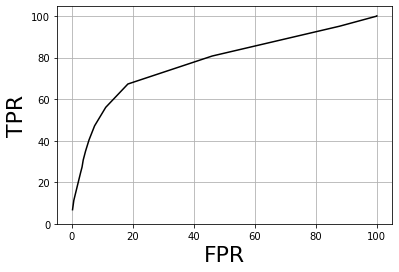

In [110]:
#Se importa la libreria de sklearn para calcular el área bajo la curva y matplotlib para graficar
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#fig, ax1=plt.subplots(figsize=(7,5))
plt.plot(y_FS, x_FS, linestyle='-', linewidth=1.5, color='black', label='Curva ROC')
plt.xlabel("FPR", fontsize=22)
plt.ylabel("TPR", fontsize=22)

ax1.set_ylim(0, max(x_FS))
ax1.set_xlim(0, max(y_FS))
plt.yticks(np.arange(0,max(y_FS)+1,max(y_FS)/5.))
plt.xticks(np.arange(0,max(x_FS)+1,max(x_FS)/5.))
ax1.tick_params('y', colors='k', labelsize= 20, length=2)
ax1.tick_params('x', colors='k', labelsize= 20, length=2)
fig.tight_layout()
plt.grid(True)

area1=round(float(format(auc(y_FS,x_FS)))/max(x_FS),1)

AUC1=str(area1)

ax1.annotate('AUC='+AUC1+'%',xy=(0.5*max(x_FS),0.3*max(x_FS)), size=22)

### Matriz de Confusión 

In [5]:
#Generar matriz de confusion 
FS_hazard=np.where(FS_hazard==-9999,np.nan,FS_hazard)
FS_hazard_r=np.where(FS_hazard<=1,3,FS_hazard) #3: celdas estables para el modelo
FS_hazard_re=np.where(FS_hazard>1,4,FS_hazard_r) # 4: Celdas indestables para el modelo
inv_raster_r=np.where(inv_raster==5,2,inv_raster) #2: celdas con MenM en el inventario
inv_raster_re=np.where(inv_raster==0,1,inv_raster_r) #1: Celdas sin MenM en el inventario

matconf=FS_hazard_re*inv_raster_re

a=np.count_nonzero(matconf == 3) # Falsos positivos= celdas sin MenM y con FS>1
b=np.count_nonzero(matconf == 4) # Verdaderos negativos= celdas sin MenM y con FS<1
c=np.count_nonzero(matconf == 6) # Falsos negativos= celdas con MenM y con FS<1
d=np.count_nonzero(matconf == 8) # Verdaderos Positivos= celdas con MenM y con FS>1
confmat=np.array([[d,a],[c,b]])



C:\Users\Edier\Anaconda3\envs\edier\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Edier\Anaconda3\envs\edier\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


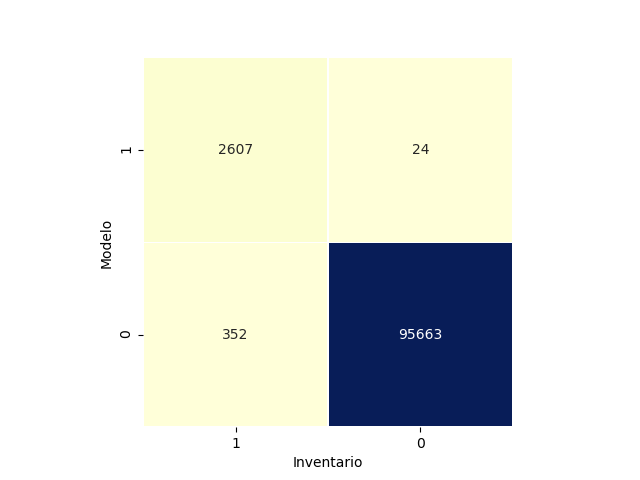

In [7]:
import seaborn as sns
sns.heatmap(confmat.T, square=True, annot=True, fmt="d",cbar=False, linewidths=.5, cmap="YlGnBu",
            xticklabels=['1','0'],
            yticklabels=['1','0'])
plt.xlabel('Inventario')
plt.ylabel('Modelo');